# Description

Data exploration for crypto market data

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid", font_scale=1.5)
%matplotlib inline

## Read the data

In [3]:
data_location = './datasets/all-crypto-currencies/crypto-markets.csv'
data = pd.read_csv(data_location, 
                   parse_dates=['date'], 
                   index_col="date")
data.head(10)

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0.0,1.488567e+09,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0.0,1.603769e+09,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0.0,1.542813e+09,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0.0,1.298955e+09,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0.0,1.168517e+09,0.3881,33.32
2013-05-03,bitcoin,BTC,Bitcoin,1,106.25,108.13,79.10,97.75,0.0,1.085995e+09,0.6424,29.03
2013-05-04,bitcoin,BTC,Bitcoin,1,98.10,115.00,92.50,112.50,0.0,1.250317e+09,0.8889,22.50
2013-05-05,bitcoin,BTC,Bitcoin,1,112.90,118.80,107.14,115.91,0.0,1.288693e+09,0.7521,11.66
2013-05-06,bitcoin,BTC,Bitcoin,1,115.98,124.66,106.64,112.30,0.0,1.249023e+09,0.3141,18.02


## Visualize closing prices for Bitcoin

In [9]:
## Closing Bitcoin prices
bit_close = data.query('slug=="bitcoin"').copy()
## Opening Bitcoin prices
bit_open = data.query('slug=="bitcoin"').copy()

In [12]:
%%time
for i in range(len(bit_close)):
    bit_close.iloc[i, 7] + 100

CPU times: total: 62.5 ms
Wall time: 54.4 ms


In [13]:
%%time
bit_close.close + 100

CPU times: total: 0 ns
Wall time: 996 µs


date
2013-04-28     234.21
2013-04-29     244.54
2013-04-30     239.00
2013-05-01     216.99
2013-05-02     205.21
               ...   
2018-11-25    4109.97
2018-11-26    3879.13
2018-11-27    3920.72
2018-11-28    4357.42
2018-11-29    4378.85
Name: close, Length: 2042, dtype: float64

In [5]:
help(sns.lineplot)

Help on function lineplot in module seaborn.relational:

lineplot(*, x=None, y=None, hue=None, size=None, style=None, data=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, dashes=True, markers=None, style_order=None, units=None, estimator='mean', ci=95, n_boot=1000, seed=None, sort=True, err_style='band', err_kws=None, legend='auto', ax=None, **kwargs)
    Draw a line plot with possibility of several semantic groupings.
    
    The relationship between ``x`` and ``y`` can be shown for different subsets
    of the data using the ``hue``, ``size``, and ``style`` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    ``hue`` and ``style`` for the same variable) can be help

In [8]:
type(bit_close.close)

pandas.core.series.Series

Text(0.5, 1.0, 'Opening price of Bitcoin')

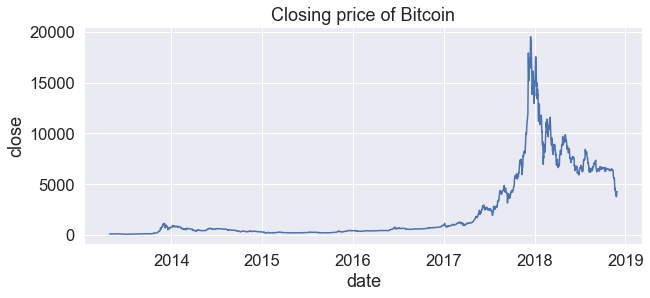

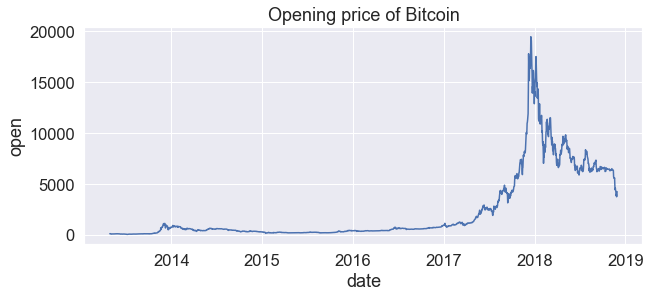

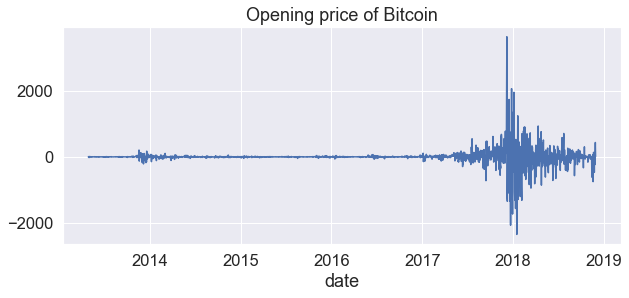

In [6]:
plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_close.index, y="close", data=bit_close)
 .set_title("Closing price of Bitcoin"))

plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_open.index, y="open", data=bit_open)
 .set_title("Opening price of Bitcoin"))

plt.figure(figsize=(10,4))
(sns.lineplot(x=bit_open.index, y=bit_open.close - bit_open.open)
 .set_title("Opening price of Bitcoin"))